# Apply an end-to-end machine learning algorithm 

**Including feature engineering, model fitting, evaluation and test**

## General steps in the full pipeline:

1. Explore and clean the data
2. Split data into train/validation/test
3. Fit an initial model and evaluate (using cross-validation method)
4. Use the Cross validation to explore and tune the hyperparameters
5. Evaluate on validation set and choose the best performed model


## 1. Clean continuous features

### Read in Data

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
titanic = pd.read_csv('train.csv')
# titanic2 = pd.read_csv('test.csv')
# titanic = pd.concat([titanic1, titanic2], ignore_index=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables

1. Fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

### Combine `SibSp` & `Parch`

<Figure size 640x480 with 0 Axes>

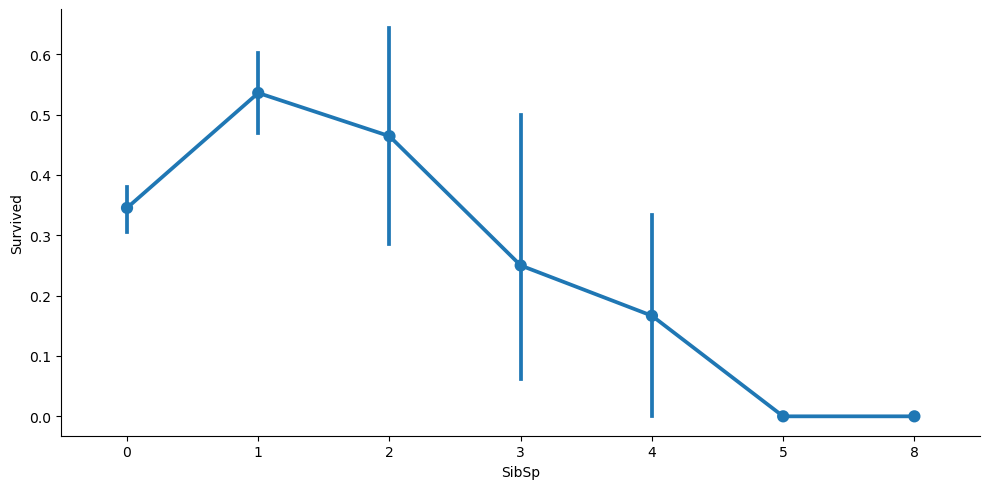

<Figure size 640x480 with 0 Axes>

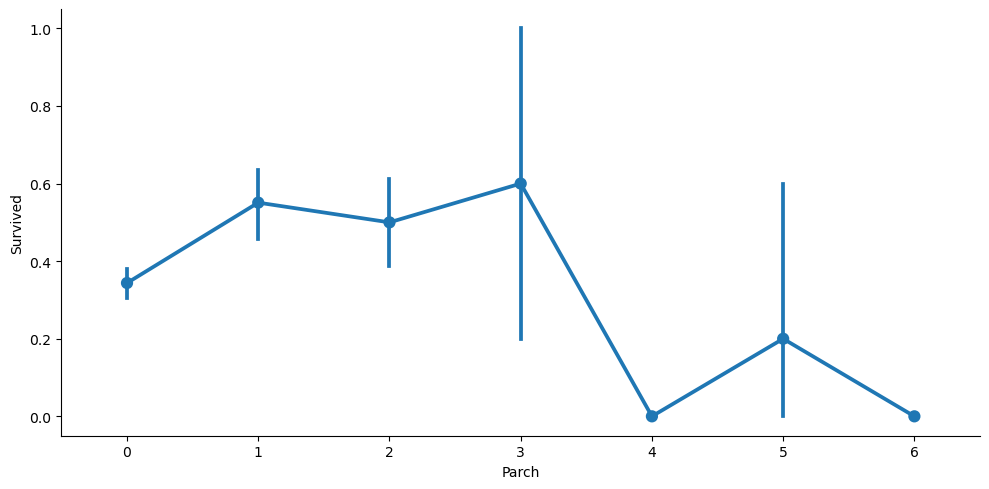

In [10]:
for col in ['SibSp', 'Parch']:
    plt.figure()
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [11]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

### Drop unnecessary variables

In [13]:
titanic.drop(['SibSp', 'Parch', 'PassengerId'], axis=1, inplace=True)

In [14]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


### Write out cleaned data

In [15]:
titanic.to_csv('titanic_cleaned.csv', index=False)

### Read in cleaned data

In [16]:
titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


## Clean categorical variables

1. Create an indicator in place of `Cabin`
2. Convert `Sex` to a numeric variable
3. Drop irrelevant/repetitive variables (`Cabin`, `Embarked`, `Name`, `Ticket`)


### Create indicator for `Cabin`

In [20]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

### Convert `Sex` to numeric

In [21]:
gender_num = {'male':0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

### Drop unnecessary variables

In [22]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0


In [24]:
titanic.describe()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.904602,0.228956
std,0.486592,0.836071,0.477990,13.002015,49.693429,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000,1.000000


## Write out cleaned data

In [23]:
titanic.to_csv('titanic_cleaned.csv', index=False)

## 2. Train-Validation-Test Split

In [26]:
from sklearn.model_selection import train_test_split

### Read the cleaned data

In [25]:
titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Split into train, val and test

In [42]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [41]:
print(len(y_train))
print(len(X_train['Pclass']))

534
534


In [35]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


### Write out data

In [43]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)


## 3. Fit a basic model using cross-validation

We will use 5-fold cross-validation method

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [57]:
tr_labels.head()

,Survived
0,1
1,0
2,1
3,0
4,1


In [58]:
# Store the model:
rf = RandomForestClassifier()
# It is possible to insert hyperparameters in the (), but for now we will leave it empty.

In [59]:
scores = cross_val_score(rf, tr_features, tr_labels, cv=5)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

The above warning is telling us that the RF model prefers to work with a 1-D array instead of the given column-vector , let's change it so this warning won't show again

In [60]:
scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)

In [61]:
scores

array([0.8317757 , 0.8411215 , 0.79439252, 0.79439252, 0.82075472])

## Tune hyperparameters

Here, inseat of using the `cross_val_score` method, we will use the `GridSearchCV`, which performs grid search of hyperparameters within cross-validation.

In [63]:
from sklearn.model_selection import GridSearchCV

In [67]:
# A function that prints the average accuracy score and the STD across the 5-folds, for evey combination of hyperparameters
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))
    

In [68]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
    
}
# n_estimators - number of decision trees in the forest
# max_depth - how deep each of the trees will go. None defines that the tress will go as deep as needed to get good predictions

cv = GridSearchCV(rf, parameters, cv=5) # define the grid search model
cv.fit(tr_features, tr_labels.values.ravel()) # fit the model to the training set

print_results(cv)

# There are 12 possible combinations of hyperparameters and 5-folds, meaning this will result 60 possible models

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.727 (+/-0.126) for {'max_depth': 2, 'n_estimators': 5}
0.796 (+/-0.106) for {'max_depth': 2, 'n_estimators': 50}
0.8 (+/-0.119) for {'max_depth': 2, 'n_estimators': 100}
0.807 (+/-0.034) for {'max_depth': 10, 'n_estimators': 5}
0.822 (+/-0.051) for {'max_depth': 10, 'n_estimators': 50}
0.815 (+/-0.034) for {'max_depth': 10, 'n_estimators': 100}
0.802 (+/-0.065) for {'max_depth': 20, 'n_estimators': 5}
0.813 (+/-0.033) for {'max_depth': 20, 'n_estimators': 50}
0.815 (+/-0.018) for {'max_depth': 20, 'n_estimators': 100}
0.796 (+/-0.055) for {'max_depth': None, 'n_estimators': 5}
0.822 (+/-0.021) for {'max_depth': None, 'n_estimators': 50}
0.813 (+/-0.04) for {'max_depth': None, 'n_estimators': 100}


The important thing here is that we got the approx. same results as before with the `cross_val_score` method, but with fewer parameters, hence the chance for overfitting is lower

## 3. Evaluate the model on validation set

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

### read the val and test set data

In [71]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

In [76]:
val_features.head()

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,3,0,18.000000,20.2125,2,0
1,3,0,29.699118,8.0500,0,0
2,3,0,40.500000,7.7500,0,0
3,3,1,31.000000,20.5250,2,0
4,2,0,32.000000,10.5000,0,0


Take the best 3 combinations of hyperparameters from the results above and train them on the full training set.

Before, we trained the models on 80% of the training data since we performed cross-validation.



In [74]:
# Best model:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

# 2nd best model:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())

# 3rd best model:
rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier()

## 4. Evaluate models on validation set

In [78]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred) , 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                       mdl.n_estimators,
                                                                       accuracy,
                                                                       precision,
                                                                       recall))

MAX DEPTH: 10 / # OF EST: 5 -- A: 0.793 / P: 0.791 / R: 0.697
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.821 / P: 0.855 / R: 0.697
MAX DEPTH: None / # OF EST: 100 -- A: 0.821 / P: 0.824 / R: 0.737


Here we can see that the best performed model on the training set didn't perform best on the validation set. This model is the simplest and has fewest parameters so maybe it's not complex enough to learn the patterns in the data.

We will use the second model since it performed best out of the model.

## 5. Evaluate the chosen model on the test set

In [80]:
y_pred = rf2.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred) , 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                   rf2.n_estimators,
                                                                   accuracy,
                                                                   precision,
                                                                   recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.787 / P: 0.737 / R: 0.646


### plot ROC and AUC score

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
# validation set
y_pred_val = rf2.predict(val_features)
val_fpr, val_tpr, val_thresholds = roc_curve(val_labels, y_pred_val)
AUC_val = round(roc_auc_score(val_labels, y_pred_val),2)

In [94]:
# test set
y_pred_test = rf2.predict(test_features)
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, y_pred_test)
AUC_test = round(roc_auc_score(test_labels, y_pred_test),2)

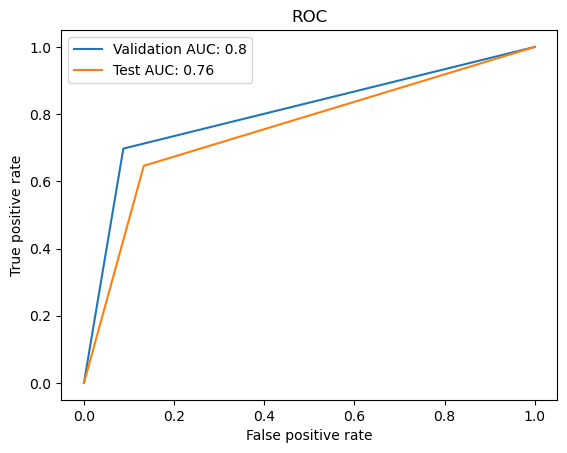

In [96]:
plt.plot(val_fpr, val_tpr, label='Validation AUC: {}'.format(AUC_val))
plt.plot(test_fpr, test_tpr, label='Test AUC: {}'.format(AUC_test))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.show()